# Heart Attack Prediction Models

## 0. Set up

In [ ]:
# downloading the "heart_attack_data.csv" file
!gdown 1c7AY4qVVq-OmazupDO93qWxr7Jpch02f

Downloading...
From: https://drive.google.com/uc?id=1c7AY4qVVq-OmazupDO93qWxr7Jpch02f
To: /content/heart_attack_data.csv
100% 11.3k/11.3k [00:00<00:00, 43.7MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv("heart_attack_data.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 1. EDA (Exploratory Data Analysis)

Data Variables:
- age: Age of the patient (range 29-77)
- sex: Sex of the patient (categorical 0/1)
- cp: Chest pain type (categorical)
-- 0 = typical angina
-- 1 = atypical angina
-- 2 = non-anginal pain
-- 3 = asymptomatic
- trtbps: resting blood pressure (in mm Hg) (range 94-200)
- chol: cholestoral in mg/dl fetched via BMI sensor (range 126-564)
- fbs: (fasting blood sugar > 120 mg/dl) (categorical 1 = true; 0 = false)
- restecg: resting electrocardiographic results (categorical)
-- 0 = normal
-- 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalachh : maximum heart rate achieved (range 71-202)
- exng: exercise induced angina (categorical 1 = yes; 0 = no)
- oldpeak: previous peak (range 0 to 6.2)
- slp: slope (categorical 0, 1, 2)
- caa: number of major vessels (categorical 0-4)
- thall: Thalium Stress Test result (categorical 0-3)
- output:
-- 0 = less chance of heart attack
-- 1= more chance of heart attack

In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (303, 14)


In [ ]:
# categorical features
cat_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

# continuous features
con_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# target
target_col = ['output']

print("Categorial Features:", cat_cols)
print("Continuous Features:", con_cols)
print("Target:", target_col)

Categorial Features: ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
Continuous Features: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Target: ['output']


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


### Single Variable Analysis (Univariate)

Categorical features

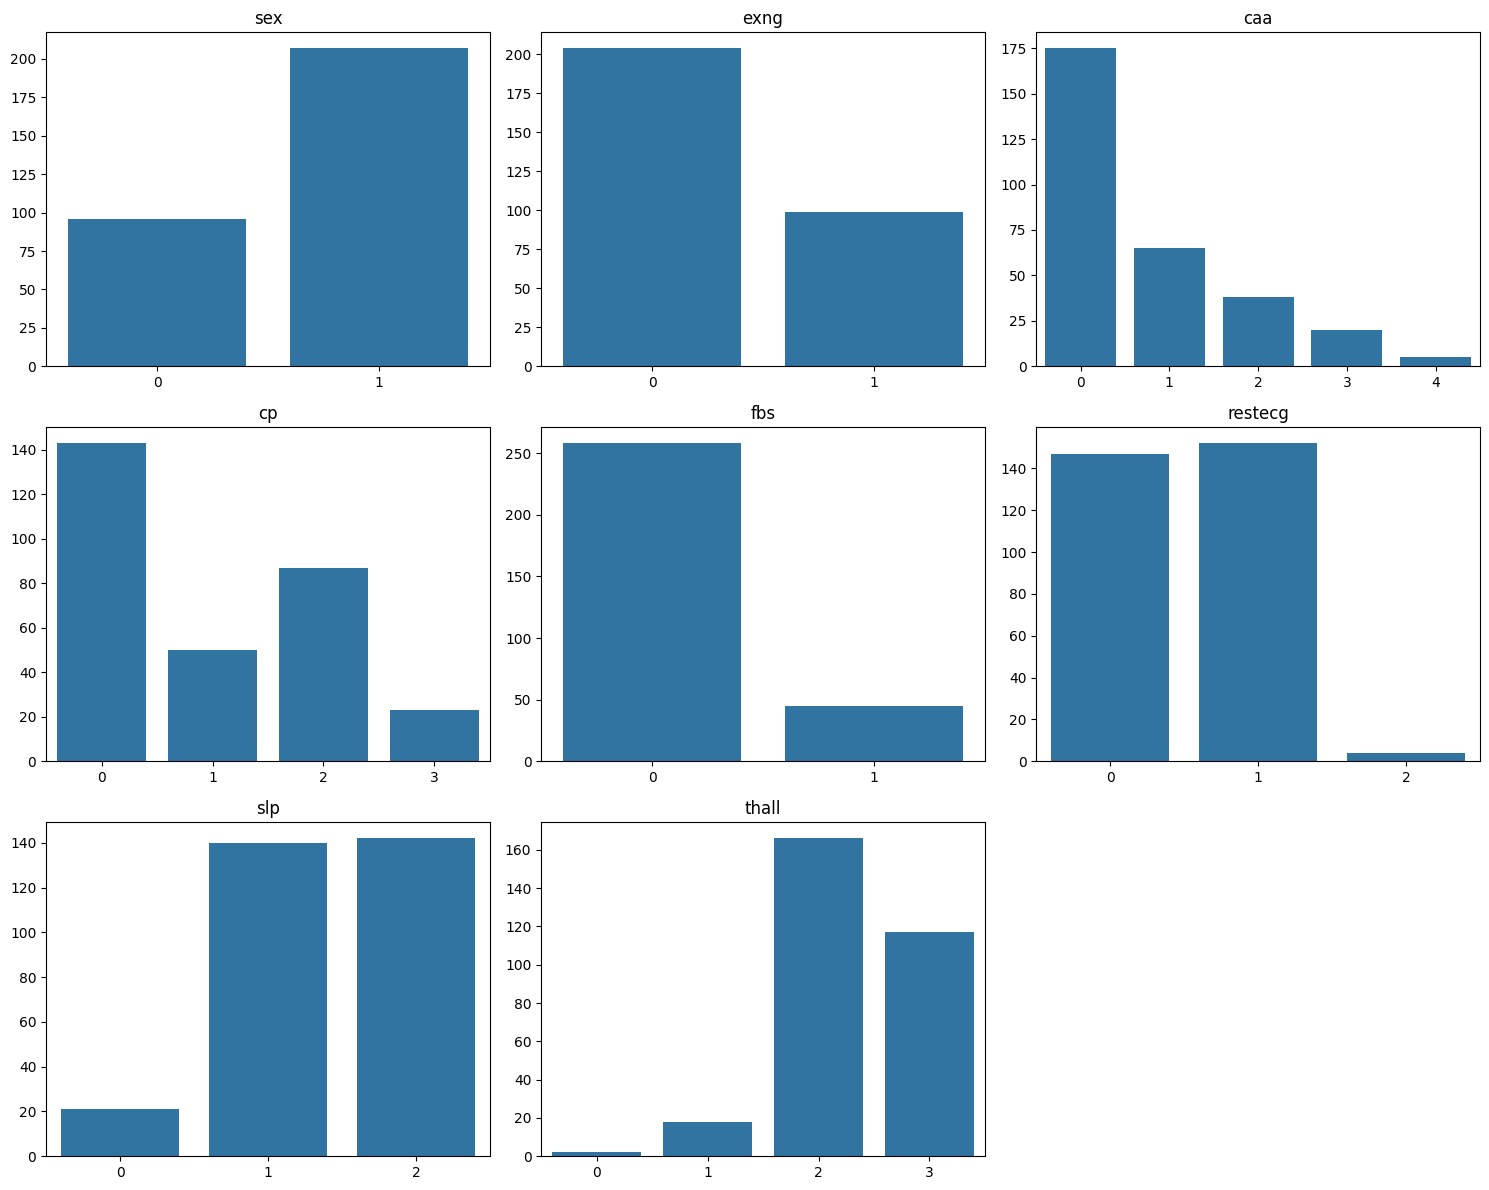

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

columns = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
titles = ['Sex', 'Exng', 'Caa', 'Cp', 'Fbs', 'Restecg', 'Slp', 'Thall']

for ax, col, title in zip(axes, columns, titles):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("")

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Continuous features

In [ ]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


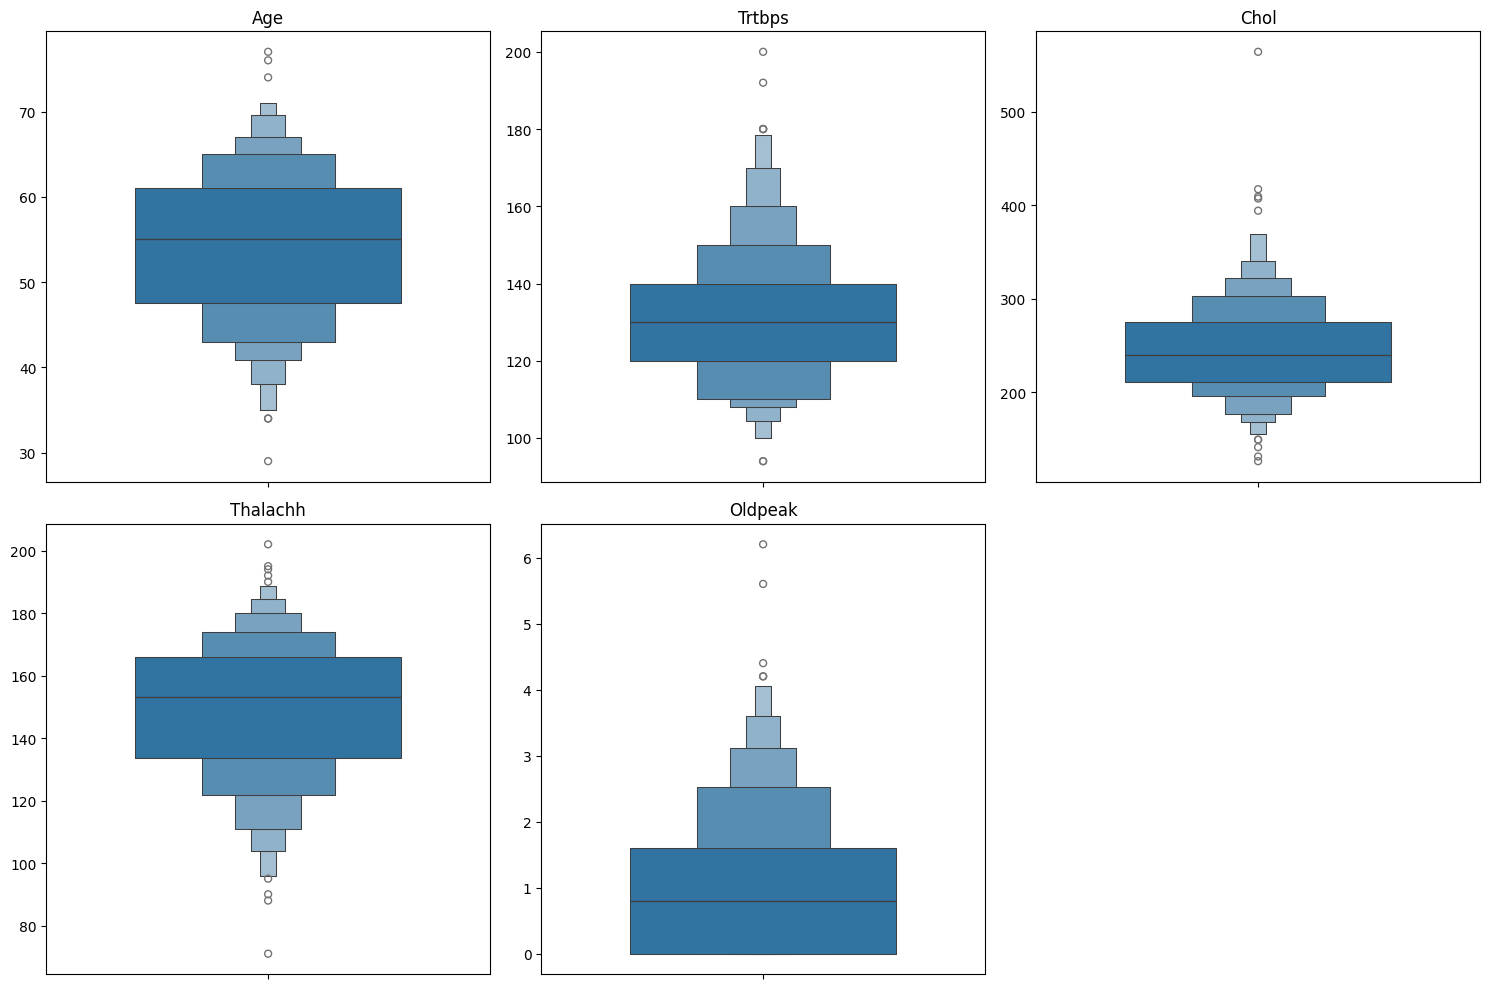

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
titles = ['Age', 'Trtbps', 'Chol', 'Thalachh', 'Oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, col, title in zip(axes, columns, titles):
    sns.boxenplot(y=df[col], ax=ax, width=0.6)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("")

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Output

<ipython-input-10-f8dbe11e09b1>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Heart attack unlikely (0)", "Heart attack likely (1)"])


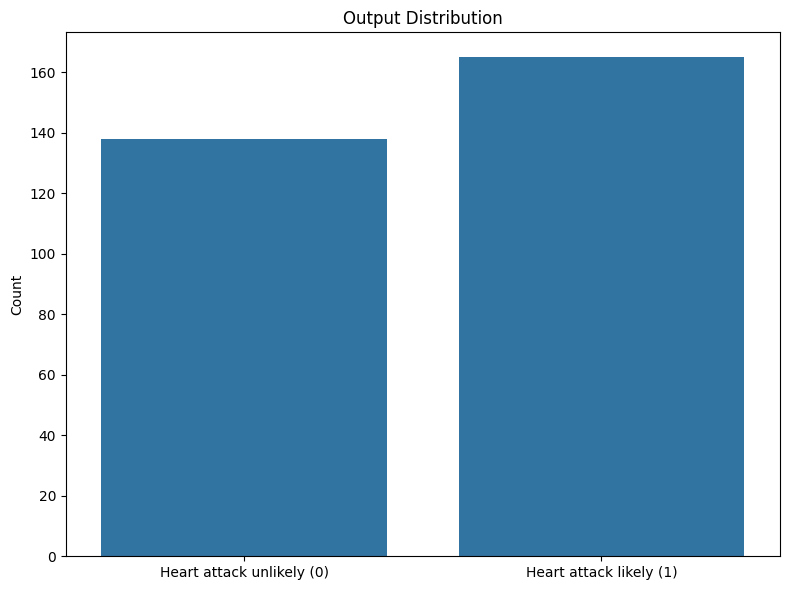

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(ax=ax, data=df, x='output')
ax.set_xticklabels(["Heart attack unlikely (0)", "Heart attack likely (1)"])
ax.set_title("Output Distribution")
ax.set_xlabel("")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

### Two Variable Analysis (Bivariate - features and output)

Categorical features

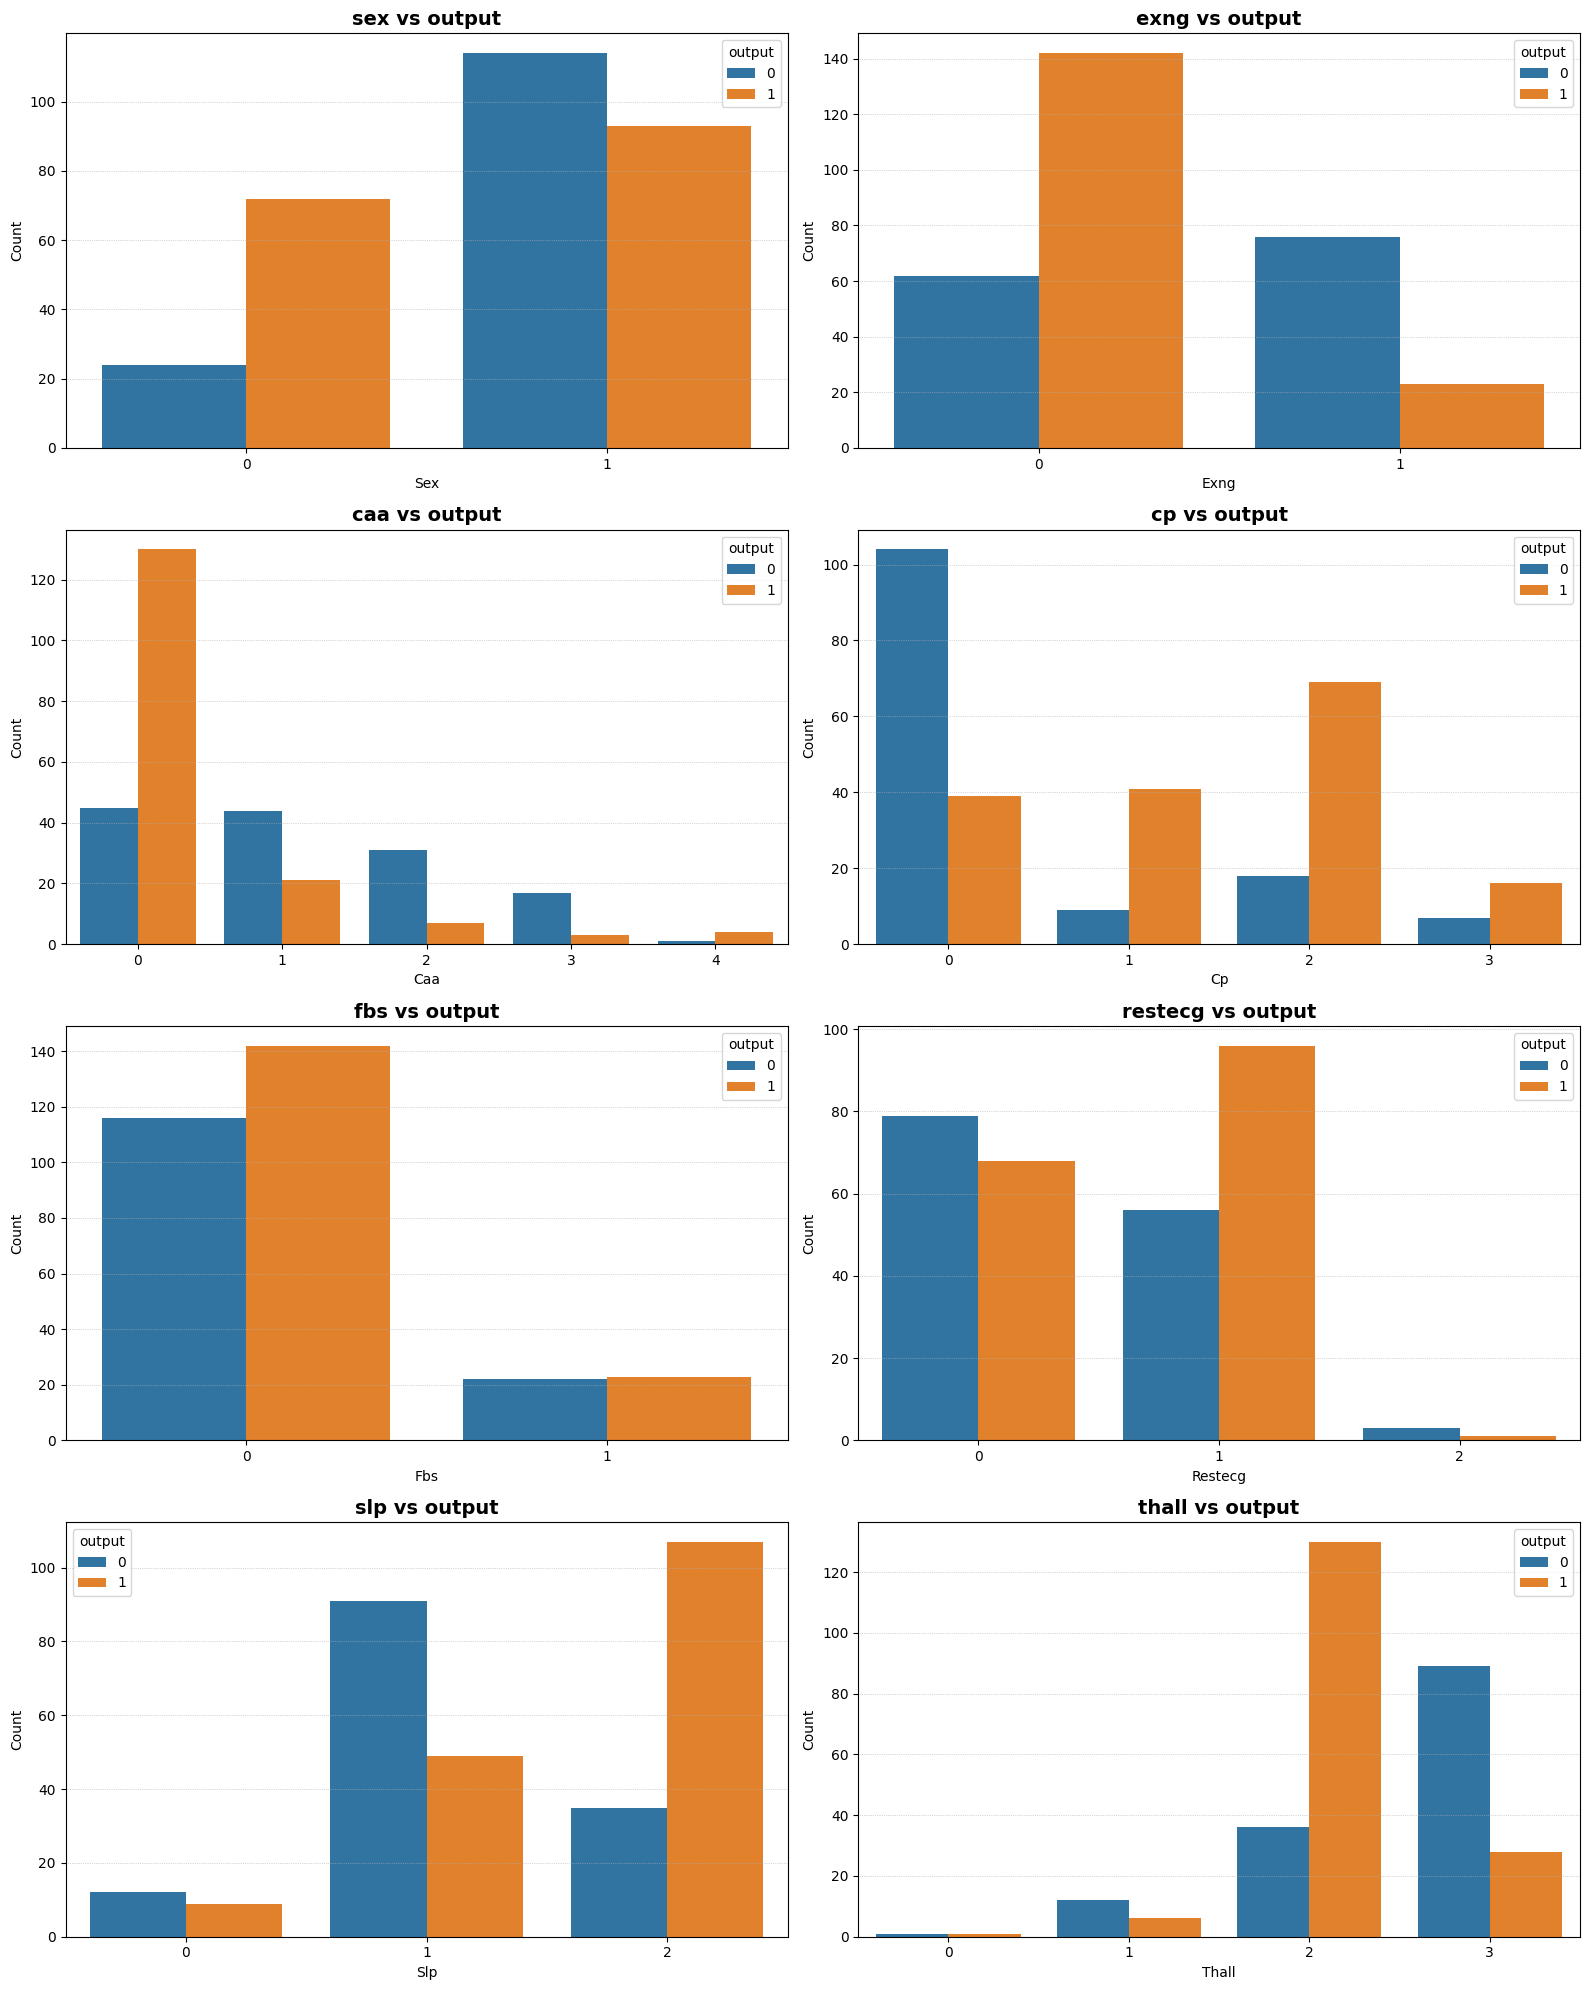

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for ax, feature in zip(axes, cat_cols):
    sns.countplot(data=df, x=feature, hue='output', ax=ax)
    ax.set_title(f'{feature} vs output', fontsize=14, fontweight='bold')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel("Count")
    ax.grid(axis='y', linestyle=':', linewidth=0.5)

for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Continuous features

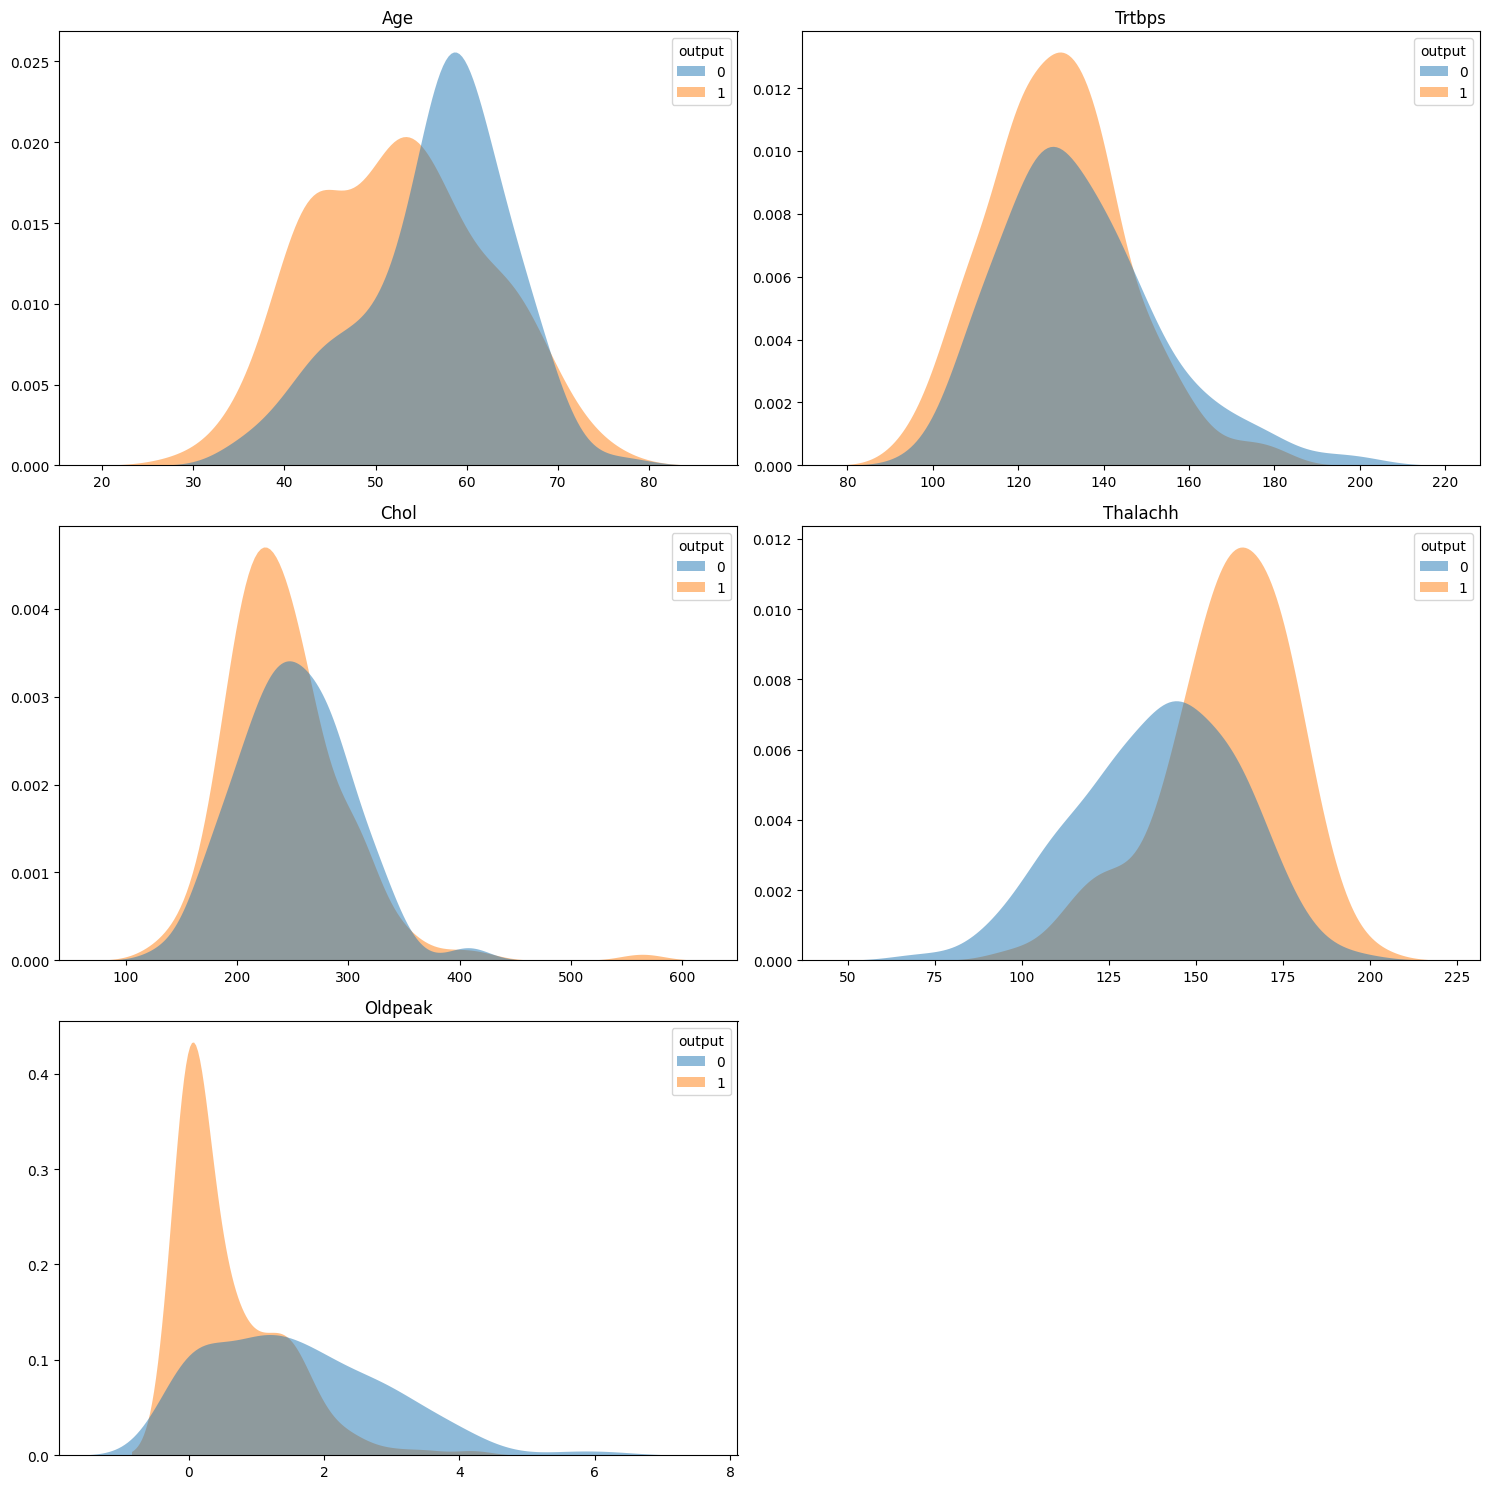

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
titles = ['Age', 'Trtbps', 'Chol', 'Thalachh', 'Oldpeak']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for ax, col, title in zip(axes, columns, titles):
    sns.kdeplot(data=df, x=col, hue="output", fill=True, alpha=0.5, linewidth=0, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("")

for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Features to features relationships

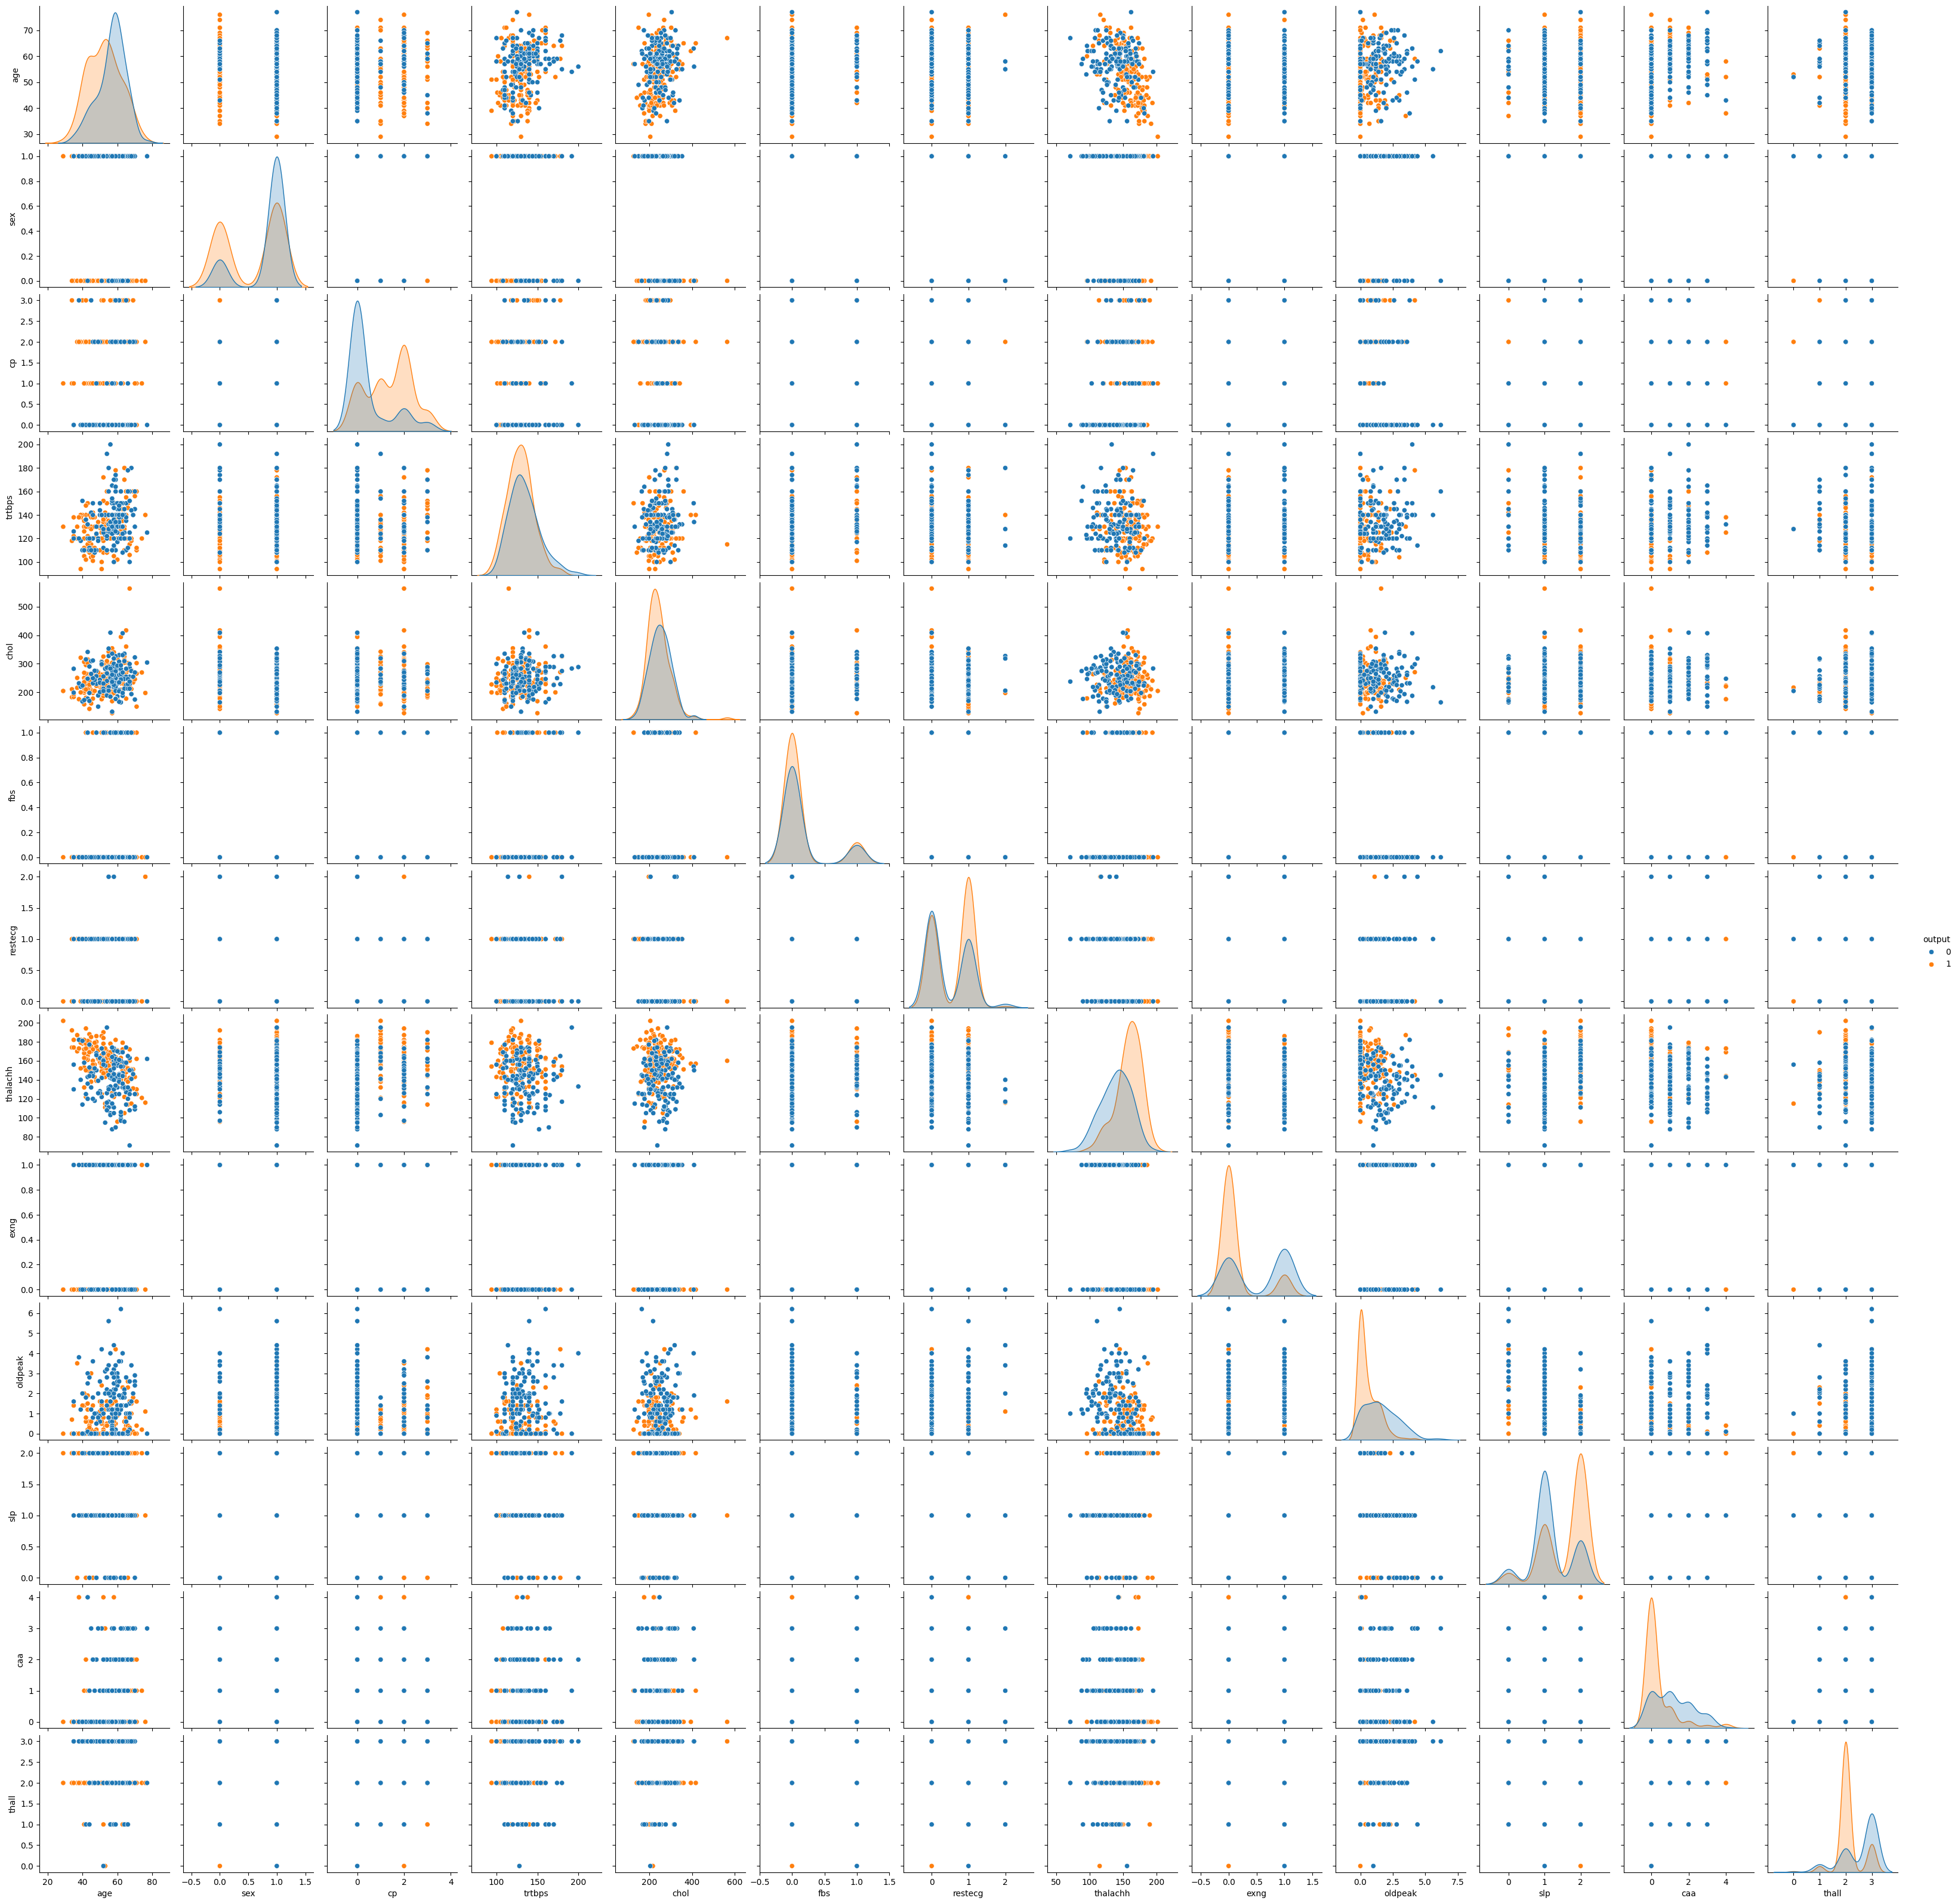

In [ ]:
sns.pairplot(df,hue='output')
plt.show()

<ipython-input-5-388d481daf2b>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=90)


<Figure size 1200x1200 with 0 Axes>

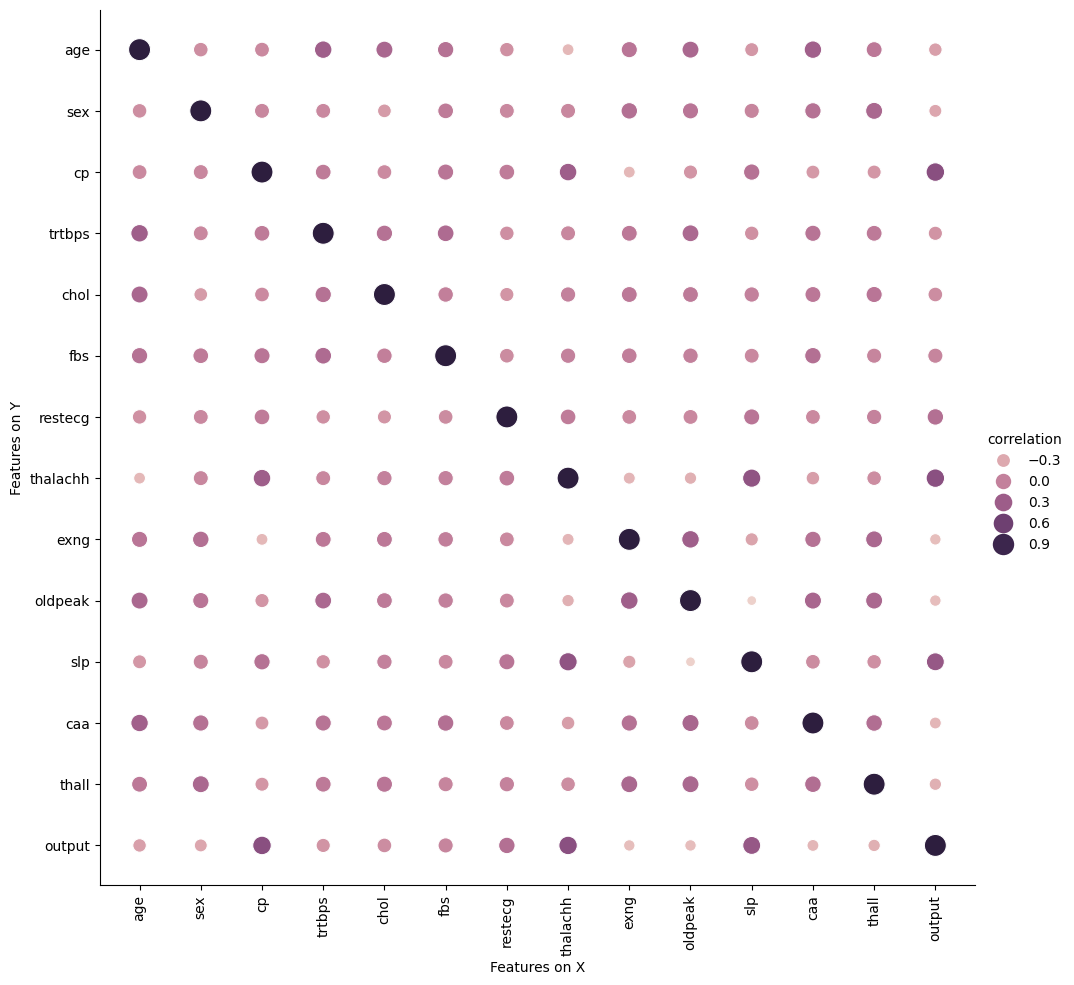

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 12))

corr_mat = df.corr().stack().reset_index(name="correlation")

g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    height=10, sizes=(50, 250),
)

g.set(xlabel="Features on X", ylabel="Features on Y", aspect="equal")
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=90)

plt.show()

Observations:
- No NaN values
- cp = 0 --> lower chance of heart attack
- caa = 0 --> higher chance of heart attack
- sex = 0 --> higher chance of heart attack
- thall = 2 --> higher chance of heart attak
- exng = 0 --> higher chance of heart attack

## 2. Machine Learning Models with model evaluations (and hyperparameter tuning)

### Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

df1 = df

# using pd.get_dummies to encode categorical features
df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True)

X = df1.drop(['output'],axis=1)
y = df1[['output']]

scaler = StandardScaler()

X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trtbps     303 non-null    float64
 2   chol       303 non-null    float64
 3   thalachh   303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   sex_1      303 non-null    bool   
 6   exng_1     303 non-null    bool   
 7   caa_1      303 non-null    bool   
 8   caa_2      303 non-null    bool   
 9   caa_3      303 non-null    bool   
 10  caa_4      303 non-null    bool   
 11  cp_1       303 non-null    bool   
 12  cp_2       303 non-null    bool   
 13  cp_3       303 non-null    bool   
 14  fbs_1      303 non-null    bool   
 15  restecg_1  303 non-null    bool   
 16  restecg_2  303 non-null    bool   
 17  slp_1      303 non-null    bool   
 18  slp_2      303 non-null    bool   
 19  thall_1    303 non-null    bool   
 20  thall_2   

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (242, 22)
X_test shape: (61, 22)


### Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

log_reg = LogisticRegression(random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)
svm = SVC(probability=True, random_state=0)
nvb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

models = [log_reg, rf, gbc, xgb, svm, nvb, knn]
for model in models:
    model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Model:     {model.__class__.__name__}")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC:   {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.4f}")
    print("-" * 50)

for model in models:
    evaluate_model(model, X_test, y_test)

Model:     LogisticRegression
Accuracy:  0.8852
Precision: 0.9091
Recall:    0.8824
F1-Score:  0.8955
ROC-AUC:   0.9390
--------------------------------------------------
Model:     RandomForestClassifier
Accuracy:  0.8361
Precision: 0.8529
Recall:    0.8529
F1-Score:  0.8529
ROC-AUC:   0.9270
--------------------------------------------------
Model:     GradientBoostingClassifier
Accuracy:  0.8361
Precision: 0.8750
Recall:    0.8235
F1-Score:  0.8485
ROC-AUC:   0.9216
--------------------------------------------------
Model:     XGBClassifier
Accuracy:  0.8525
Precision: 0.9032
Recall:    0.8235
F1-Score:  0.8615
ROC-AUC:   0.9379
--------------------------------------------------
Model:     SVC
Accuracy:  0.8525
Precision: 0.9310
Recall:    0.7941
F1-Score:  0.8571
ROC-AUC:   0.9336
--------------------------------------------------
Model:     GaussianNB
Accuracy:  0.8525
Precision: 0.8571
Recall:    0.8824
F1-Score:  0.8696
ROC-AUC:   0.8845
-----------------------------------------

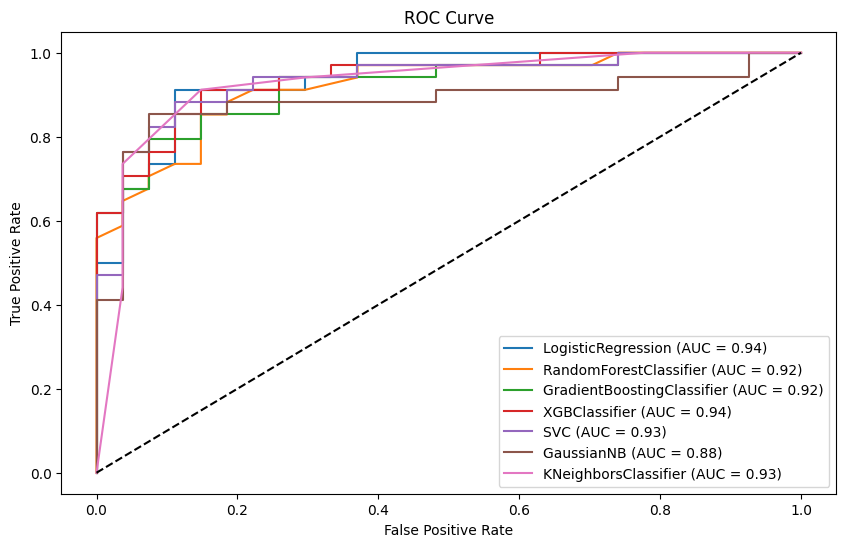

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for model in models:
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

lr = LogisticRegression(max_iter=1000, random_state=0)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_

y_pred_lr = best_lr.predict(X_test)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_lr):.4f}")

Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Accuracy:  0.8852
Precision: 0.9091
Recall:    0.8824
F1-Score:  0.8955


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_knn):.4f}")

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy:  0.8852
Precision: 0.8857
Recall:    0.9118
F1-Score:  0.8986


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 3. Model Explainability

using SHAP for feature importance

Explaining Logistic Regression Model...


  0%|          | 0/61 [00:00<?, ?it/s]

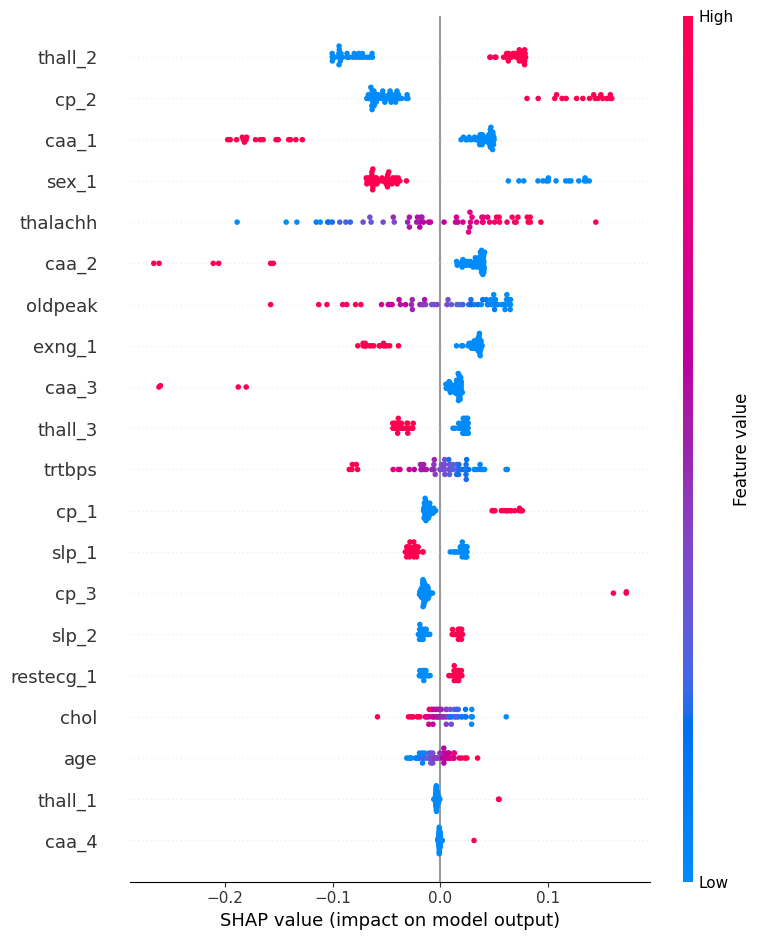

Explaining K-Nearest Neighbors Model...


  0%|          | 0/61 [00:00<?, ?it/s]

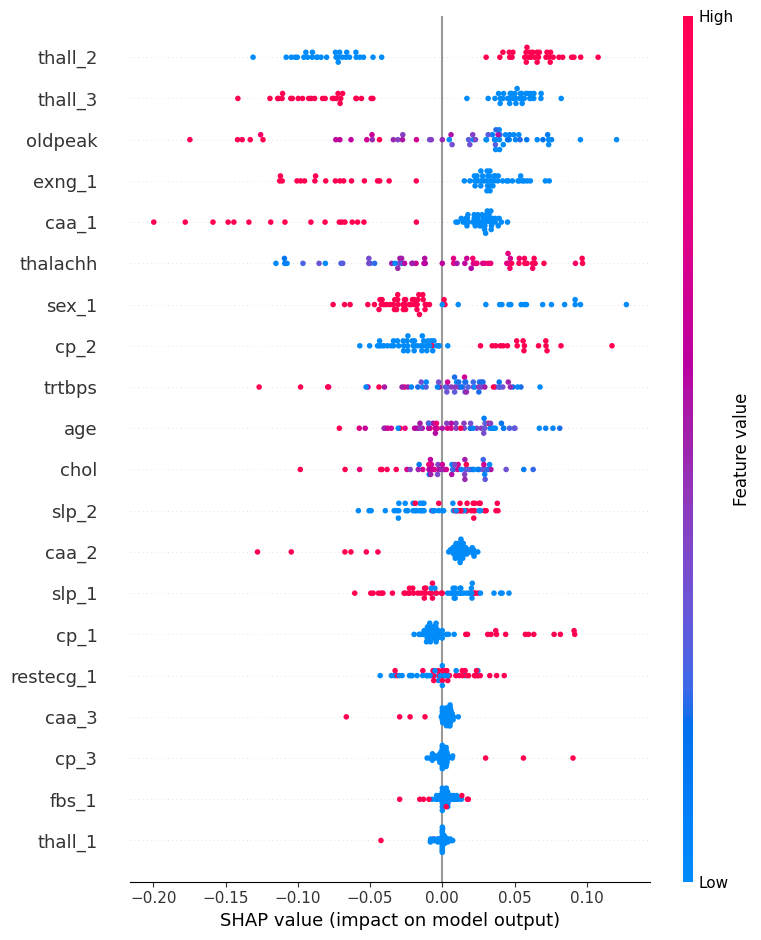

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression SHAP
print("Explaining Logistic Regression Model...")
log_reg_explainer = shap.KernelExplainer(best_lr.predict_proba, X_train)
log_reg_shap_values = log_reg_explainer.shap_values(X_test)
shap.summary_plot(log_reg_shap_values[:,:,1], X_test)

# K-Nearest Neighbors SHAP
print("Explaining K-Nearest Neighbors Model...")
knn_explainer = shap.KernelExplainer(best_knn.predict_proba, X_train)
knn_shap_values = knn_explainer.shap_values(X_test)
shap.summary_plot(knn_shap_values[:,:,1], X_test)

## 4. Interactive Visualizations

In [ ]:
import plotly.express as px

correlation_matrix = df.corr()

fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='Viridis',
                title="Feature Correlation Heatmap")
fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
fig = px.scatter_matrix(df, dimensions=["age", "chol", "thalachh", "trtbps"],
                        color="output", title="Pair Plot of Continuous Variables")
fig.update_layout(height=700, width=900)
fig.show()

In [ ]:
fig = px.scatter(df, x="age", y="chol", color="output", marginal_x="histogram", marginal_y="box",
                 title="Cholesterol vs Age with Marginal Distributions")
fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='age', y='thalachh', z='chol', color='output',
                    title="3D Scatter Plot of Age, Thalachh, and Cholesterol")
fig.update_layout(height=700, width=900)
fig.show()

In [ ]:
import plotly.express as px

fig = px.violin(df, y='chol', x='output', color='output', box=True, points="all",
                title="Cholesterol Distribution by Output")
fig.update_layout(height=600, width=800)
fig.show()